<a href="https://colab.research.google.com/github/SAVCHink2042/ML-algorithm/blob/main/Gaussian_Bayesian_%D0%A1lassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Наивный Байес

Датасет отсюда: https://www.kaggle.com/datasets/himanshunakrani/naive-bayes-classification-data

In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

data = pd.read_csv( "Naive-Bayes-Classification-Data.csv" )

matrix = data.iloc[:, :2]
target = data.iloc[:,  2]

x_train, x_test, y_train, y_test  = train_test_split(matrix, target, test_size = 0.25 )
first_col  = x_train.iloc[:, 0]
second_col = x_train.iloc[:, 1]
m_1_1 =  np.mean( first_col[y_train == 1 ] )        # мат ожидание первого признака первого класса

m_1_2  = np.mean( first_col[y_train == 0 ] )      # мат ожидание первого признака второго класса

m_2_1  = np.mean( second_col[y_train == 1 ] )      # мат ожидание второго признака первого класса

m_2_2  = np.mean( second_col[y_train == 0 ] )      # мат ожидание второго признака второго класса

s_1_1  = np.var(  first_col[y_train == 1] )      # дисперсия первого признака первого класса

s_1_2  = np.var(  first_col[y_train == 0] )      # дисперсия первого признака второго класса

s_2_1  = np.var(  second_col[y_train == 1] )      # дисперсия второго признака первого класса

s_2_2  = np.var(  second_col[y_train == 0] )      # дисперсия второго признака второго класса


print("мат ожидание первого признака первого класса ", m_1_1 )
print("мат ожидание первого признака второго класса ", m_1_2 )
print("мат ожидание второго признака первого класса ", m_2_1 )
print("мат ожидание второго признака второго класса ", m_2_2 )
print("дисперсия первого признака первого класса ", s_1_1 )
print("дисперсия второго признака первого класса ", s_1_2 )
print("дисперсия второго признака первого класса ", s_2_1 )
print("дисперсия второго признака второго класса ", s_2_2 )

accur = 0
prob = []
for i in range( len(x_test) ) :
    a1 =  -np.log( np.sqrt( s_1_1*s_2_1 ) ) - ( x_test.iloc[i, 0] - m_1_1 )**2 /(2 * s_1_1 ) - ( x_test.iloc[i, 1] - m_2_1 )**2 / ( 2 * s_2_1 )   # вероятность 1 класса
    a2 =  -np.log( np.sqrt(s_1_2 * s_2_2) ) - ( x_test.iloc[i, 0] - m_1_2)**2 / (2 * s_1_2 ) - ( x_test.iloc[i, 1] - m_2_2 )**2 / ( 2 * s_2_2 )  # вероятность 0 класса
    if( (a1 > a2 and y_test.iloc[i] == 0 ) or (a1 < a2 and y_test.iloc[i] == 1) ) :
        accur+=1
    prob.append( [np.exp(a1) / (np.exp(a1)+np.exp(a2 ) ), y_test.iloc[i]]  )



print("доля неверных классификаций: ", accur/len(x_test) )


мат ожидание первого признака первого класса  44.71849865951743
мат ожидание первого признака второго класса  43.96782841823056
мат ожидание второго признака первого класса  71.73190348525469
мат ожидание второго признака второго класса  86.58713136729223
дисперсия первого признака первого класса  75.9931430542878
дисперсия второго признака первого класса  13.34480949334792
дисперсия второго признака первого класса  37.34903578693154
дисперсия второго признака второго класса  20.022568982742605
доля неверных классификаций:  0.07228915662650602


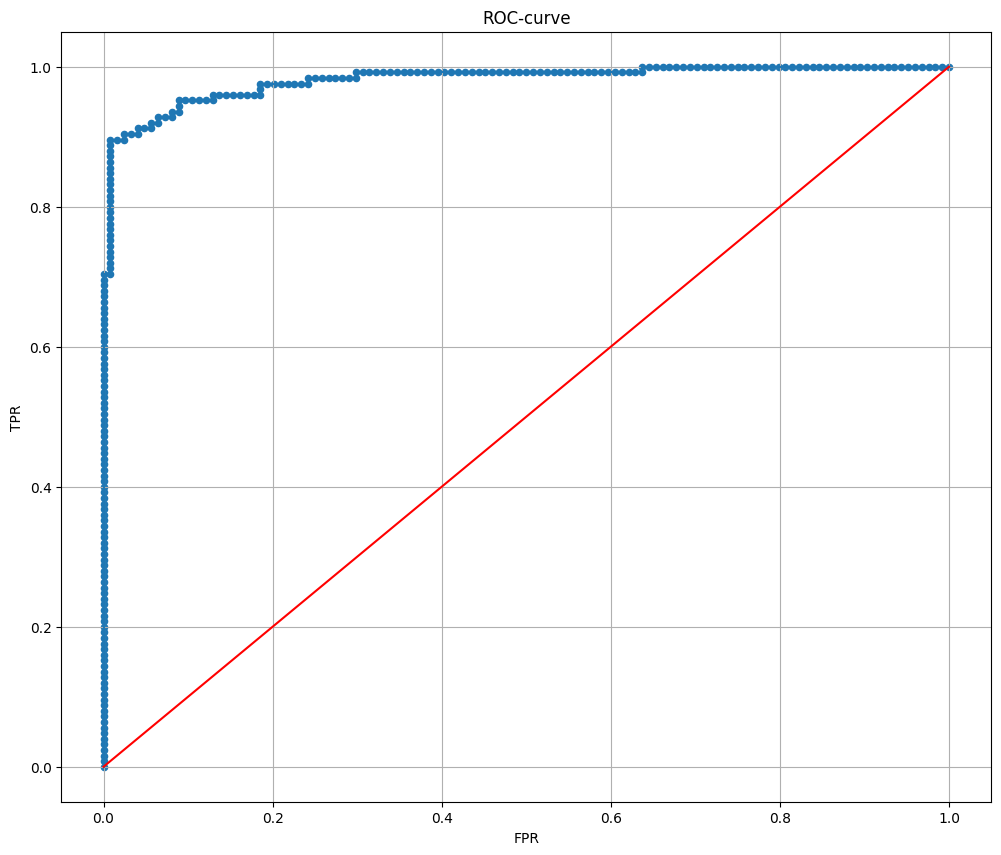

AUC: 0.981


In [11]:
import matplotlib.pyplot as plt

prob.sort( key = lambda x: -x[0] )

tpr=[0]
fpr=[0]
N = 0
P = 0
TP = 0
FN = 0

for  el in prob:

    if el[1] == 1:
        TP += 1
        P+=1
    else:
        FN += 1
        N+=1
    tpr.append(TP)
    fpr.append(FN)

x = [r / N for r in fpr]
y = [r / P for r in tpr ]

plt.figure(figsize =(12, 10 ))
plt.scatter( x, y, s = 20)
plt.plot(x, y)
otrezok = np.linspace(0,1, 10)
plt.plot( otrezok, otrezok, color='red', )
plt.title('ROC-curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.grid(True)
plt.show()

from sklearn.metrics import auc
roc_auc = auc(x, y)
print(f'AUC: {roc_auc:.3f}')